In [1]:
%load_ext autoreload

In [2]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import colors
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = 200
import os
import numpy as np
import pandas as pd

import mplhep as hep
plt.style.use(hep.style.CMS)

In [3]:
reco_A = "DeepSC_AlgoA"
reco_B = "DeepSC_AlgoB"
reco_C = "DeepSC_AlgoC"
reco_D = "DeepSC_AlgoD"

input_folder = "/eos/user/v/vdurupt/reco_comparison_corrected/supercluster_regression/electrons"
output_folder = "/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/Comparison_4DeepSC"

In [4]:
df_1_A = pd.HDFStore(f"{input_folder}/ele_UL18_123X_{reco_A}_object.h5py", "r")["df"]
df_1_B = pd.HDFStore(f"{input_folder}/ele_UL18_123X_{reco_B}_object.h5py", "r")["df"]
df_1_C = pd.HDFStore(f"{input_folder}/ele_UL18_123X_{reco_C}_object.h5py", "r")["df"]
df_1_D = pd.HDFStore(f"{input_folder}/ele_UL18_123X_{reco_D}_object.h5py", "r")["df"]
df_2 = pd.HDFStore(f"{input_folder}/ele_UL18_123X_Mustache_object.h5py", "r")["df"]

df_1_A.rename(columns={"output_object.csv":"obj_index"}, inplace=True)
df_1_B.rename(columns={"output_object.csv":"obj_index"}, inplace=True)
df_1_C.rename(columns={"output_object.csv":"obj_index"}, inplace=True)
df_1_D.rename(columns={"output_object.csv":"obj_index"}, inplace=True)
df_2.rename(columns={"output_object.csv":"obj_index"}, inplace=True)
# df_1.rename(columns={"ncsl_tot":"ncls_tot"}, inplace=True)
# df_2.rename(columns={"ncsl_tot":"ncls_tot"}, inplace=True)

df_1_A = df_1_A.iloc[:-1]
df_1_B = df_1_B.iloc[:-1]
df_1_C = df_1_C.iloc[:-1]
df_1_D = df_1_D.iloc[:-1]
df_2 = df_2.iloc[:-1]

# df_join = df_1.merge(df_2, on=["runId","eventId","caloindex"], suffixes=["_old", "_new"],indicator=True)

In [5]:
df_1_A.loc[df_1_A.sc_matched==True, "has_sc"] = 1
df_1_B.loc[df_1_B.sc_matched==True, "has_sc"] = 1
df_1_C.loc[df_1_C.sc_matched==True, "has_sc"] = 1
df_1_D.loc[df_1_D.sc_matched==True, "has_sc"] = 1
df_2.loc[df_2.sc_matched==True, "has_sc"] = 1

df_1_A.loc[df_1_A.sc_matched==False, "has_sc"] = 0
df_1_B.loc[df_1_B.sc_matched==False, "has_sc"] = 0
df_1_C.loc[df_1_C.sc_matched==False, "has_sc"] = 0
df_1_D.loc[df_1_D.sc_matched==False, "has_sc"] = 0
df_2.loc[df_2.sc_matched==False, "has_sc"] = 0

# Gen-matching study

In [6]:
print(f"N. electron tot in EB (DeepSC_A): {df_1_A[df_1_A.ele_eta<1.566].shape[0]}")
print(f"N. electron tot in EB (DeepSC_B): {df_1_B[df_1_B.ele_eta<1.566].shape[0]}")
print(f"N. electron tot in EB (DeepSC_C): {df_1_C[df_1_C.ele_eta<1.566].shape[0]}")
print(f"N. electron tot in EB (DeepSC_D): {df_1_D[df_1_D.ele_eta<1.566].shape[0]}")
print(f"N. electron tot in EB (Mustache): {df_2[df_2.ele_eta<1.566].shape[0]}\n")

print(f"N. electron with matched SC in EB (DeepSC_A): {df_1_A[df_1_A.ele_eta<1.566].has_sc.sum()}")
print(f"N. electron with matched SC in EB (DeepSC_B): {df_1_B[df_1_B.ele_eta<1.566].has_sc.sum()}")
print(f"N. electron with matched SC in EB (DeepSC_C): {df_1_C[df_1_C.ele_eta<1.566].has_sc.sum()}")
print(f"N. electron with matched SC in EB (DeepSC_D): {df_1_D[df_1_D.ele_eta<1.566].has_sc.sum()}")
print(f"N. electron with matched SC in EB (Mustache): {df_2[df_2.ele_eta<1.566].has_sc.sum()}\n")

print(f"N. electron GenMatched in EB (DeepSC_A): {df_1_A[(df_1_A.ele_eta<1.566)&(df_1_A.has_sc==1)].genmatched.sum()}")
print(f"N. electron GenMatched in EB (DeepSC_B): {df_1_B[(df_1_B.ele_eta<1.566)&(df_1_B.has_sc==1)].genmatched.sum()}")
print(f"N. electron GenMatched in EB (DeepSC_C): {df_1_C[(df_1_C.ele_eta<1.566)&(df_1_C.has_sc==1)].genmatched.sum()}")
print(f"N. electron GenMatched in EB (DeepSC_D): {df_1_D[(df_1_D.ele_eta<1.566)&(df_1_D.has_sc==1)].genmatched.sum()}")
print(f"N. electron GenMatched in EB (Mustache): {df_2[(df_2.ele_eta<1.566)&(df_2.has_sc==1)].genmatched.sum()}")

N. electron tot in EB (DeepSC_A): 1565646
N. electron tot in EB (DeepSC_B): 1567147
N. electron tot in EB (DeepSC_C): 1565906
N. electron tot in EB (DeepSC_D): 1564380
N. electron tot in EB (Mustache): 1563819

N. electron with matched SC in EB (DeepSC_A): 1363657.0
N. electron with matched SC in EB (DeepSC_B): 1365985.0
N. electron with matched SC in EB (DeepSC_C): 1364084.0
N. electron with matched SC in EB (DeepSC_D): 1361919.0
N. electron with matched SC in EB (Mustache): 1363861.0

N. electron GenMatched in EB (DeepSC_A): 1281765.0
N. electron GenMatched in EB (DeepSC_B): 1282050.0
N. electron GenMatched in EB (DeepSC_C): 1281852.0
N. electron GenMatched in EB (DeepSC_D): 1281404.0
N. electron GenMatched in EB (Mustache): 1277757.0


In [7]:
print(f"N. electron tot in EE (DeepSC_A): {df_1_A[df_1_A.ele_eta>1.566].shape[0]}")
print(f"N. electron tot in EE (DeepSC_B): {df_1_B[df_1_B.ele_eta>1.566].shape[0]}")
print(f"N. electron tot in EE (DeepSC_C): {df_1_C[df_1_C.ele_eta>1.566].shape[0]}")
print(f"N. electron tot in EE (DeepSC_D): {df_1_D[df_1_D.ele_eta>1.566].shape[0]}")
print(f"N. electron tot in EE (Mustache): {df_2[df_2.ele_eta>1.566].shape[0]}\n")

print(f"N. electron with matched SC in EE (DeepSC_A): {df_1_A[df_1_A.ele_eta>1.566].has_sc.sum()}")
print(f"N. electron with matched SC in EE (DeepSC_B): {df_1_B[df_1_B.ele_eta>1.566].has_sc.sum()}")
print(f"N. electron with matched SC in EE (DeepSC_C): {df_1_C[df_1_C.ele_eta>1.566].has_sc.sum()}")
print(f"N. electron with matched SC in EE (DeepSC_D): {df_1_D[df_1_D.ele_eta>1.566].has_sc.sum()}")
print(f"N. electron with matched SC in EE (Mustache): {df_2[df_2.ele_eta>1.566].has_sc.sum()}\n")

print(f"N. electron GenMatched in EE (DeepSC_A): {df_1_A[(df_1_A.ele_eta>1.566)&(df_1_A.has_sc==1)].genmatched.sum()}")
print(f"N. electron GenMatched in EE (DeepSC_B): {df_1_B[(df_1_B.ele_eta>1.566)&(df_1_B.has_sc==1)].genmatched.sum()}")
print(f"N. electron GenMatched in EE (DeepSC_C): {df_1_C[(df_1_C.ele_eta>1.566)&(df_1_C.has_sc==1)].genmatched.sum()}")
print(f"N. electron GenMatched in EE (DeepSC_D): {df_1_D[(df_1_D.ele_eta>1.566)&(df_1_D.has_sc==1)].genmatched.sum()}")
print(f"N. electron GenMatched in EE (Mustache): {df_2[(df_2.ele_eta>1.566)&(df_2.has_sc==1)].genmatched.sum()}")

N. electron tot in EE (DeepSC_A): 415505
N. electron tot in EE (DeepSC_B): 415872
N. electron tot in EE (DeepSC_C): 415350
N. electron tot in EE (DeepSC_D): 414964
N. electron tot in EE (Mustache): 415782

N. electron with matched SC in EE (DeepSC_A): 376720.0
N. electron with matched SC in EE (DeepSC_B): 377343.0
N. electron with matched SC in EE (DeepSC_C): 376529.0
N. electron with matched SC in EE (DeepSC_D): 375627.0
N. electron with matched SC in EE (Mustache): 376808.0

N. electron GenMatched in EE (DeepSC_A): 348474.0
N. electron GenMatched in EE (DeepSC_B): 348533.0
N. electron GenMatched in EE (DeepSC_C): 348468.0
N. electron GenMatched in EE (DeepSC_D): 348342.0
N. electron GenMatched in EE (Mustache): 347717.0


# Plotting basic distribution to compare matched and not-matched electrons

In [8]:
df_1_A.columns

Index(['obj_index', 'sc_matched', 'calomatched', 'caloindex', 'genmatched',
       'genindex', 'sc_index', 'seed_index', 'en_seed', 'et_seed',
       'en_seed_calib', 'et_seed_calib', 'seed_eta', 'seed_phi', 'seed_iz',
       'ele_eta', 'ele_phi', 'ele_energy', 'ele_et', 'ele_ecalEnergy',
       'ele_scRawEnergy', 'ele_scRawESEnergy', 'ele_fbrem', 'ele_e5x5',
       'ele_e3x3', 'ele_sigmaIEtaIEta', 'ele_sigmaIEtaIPhi',
       'ele_sigmaIPhiIPhi', 'ele_ecalDriveSeed', 'ele_hademCone',
       'ele_trkPModeErr', 'ele_trkPMode', 'ele_trkEtaMode', 'ele_trkPhiMode',
       'ncls_sel', 'ncls_sel_true', 'ncls_sel_false', 'ncls_true', 'ncls_tot',
       'ncls_missing', 'en_sc_raw', 'et_sc_raw', 'en_sc_calib', 'et_sc_calib',
       'calo_en_gen', 'calo_et_gen', 'calo_en_sim', 'calo_et_sim',
       'calo_geneta', 'calo_genphi', 'calo_simeta', 'calo_simphi',
       'calo_genpt', 'genpart_en', 'genpart_et', 'gen_eta', 'gen_phi',
       'gen_pt', 'nVtx', 'rho', 'obsPU', 'truePU', 'eventId', 'runId',

In [9]:
df_1_B.columns

Index(['obj_index', 'sc_matched', 'calomatched', 'caloindex', 'genmatched',
       'genindex', 'sc_index', 'seed_index', 'en_seed', 'et_seed',
       'en_seed_calib', 'et_seed_calib', 'seed_eta', 'seed_phi', 'seed_iz',
       'ele_eta', 'ele_phi', 'ele_energy', 'ele_et', 'ele_ecalEnergy',
       'ele_scRawEnergy', 'ele_scRawESEnergy', 'ele_fbrem', 'ele_e5x5',
       'ele_e3x3', 'ele_sigmaIEtaIEta', 'ele_sigmaIEtaIPhi',
       'ele_sigmaIPhiIPhi', 'ele_ecalDriveSeed', 'ele_hademCone',
       'ele_trkPModeErr', 'ele_trkPMode', 'ele_trkEtaMode', 'ele_trkPhiMode',
       'ncls_sel', 'ncls_sel_true', 'ncls_sel_false', 'ncls_true', 'ncls_tot',
       'ncls_missing', 'en_sc_raw', 'et_sc_raw', 'en_sc_calib', 'et_sc_calib',
       'calo_en_gen', 'calo_et_gen', 'calo_en_sim', 'calo_et_sim',
       'calo_geneta', 'calo_genphi', 'calo_simeta', 'calo_simphi',
       'calo_genpt', 'genpart_en', 'genpart_et', 'gen_eta', 'gen_phi',
       'gen_pt', 'nVtx', 'rho', 'obsPU', 'truePU', 'eventId', 'runId',

In [10]:
df_1_C.columns

Index(['obj_index', 'sc_matched', 'calomatched', 'caloindex', 'genmatched',
       'genindex', 'sc_index', 'seed_index', 'en_seed', 'et_seed',
       'en_seed_calib', 'et_seed_calib', 'seed_eta', 'seed_phi', 'seed_iz',
       'ele_eta', 'ele_phi', 'ele_energy', 'ele_et', 'ele_ecalEnergy',
       'ele_scRawEnergy', 'ele_scRawESEnergy', 'ele_fbrem', 'ele_e5x5',
       'ele_e3x3', 'ele_sigmaIEtaIEta', 'ele_sigmaIEtaIPhi',
       'ele_sigmaIPhiIPhi', 'ele_ecalDriveSeed', 'ele_hademCone',
       'ele_trkPModeErr', 'ele_trkPMode', 'ele_trkEtaMode', 'ele_trkPhiMode',
       'ncls_sel', 'ncls_sel_true', 'ncls_sel_false', 'ncls_true', 'ncls_tot',
       'ncls_missing', 'en_sc_raw', 'et_sc_raw', 'en_sc_calib', 'et_sc_calib',
       'calo_en_gen', 'calo_et_gen', 'calo_en_sim', 'calo_et_sim',
       'calo_geneta', 'calo_genphi', 'calo_simeta', 'calo_simphi',
       'calo_genpt', 'genpart_en', 'genpart_et', 'gen_eta', 'gen_phi',
       'gen_pt', 'nVtx', 'rho', 'obsPU', 'truePU', 'eventId', 'runId',

In [11]:
df_1_D.columns

Index(['obj_index', 'sc_matched', 'calomatched', 'caloindex', 'genmatched',
       'genindex', 'sc_index', 'seed_index', 'en_seed', 'et_seed',
       'en_seed_calib', 'et_seed_calib', 'seed_eta', 'seed_phi', 'seed_iz',
       'ele_eta', 'ele_phi', 'ele_energy', 'ele_et', 'ele_ecalEnergy',
       'ele_scRawEnergy', 'ele_scRawESEnergy', 'ele_fbrem', 'ele_e5x5',
       'ele_e3x3', 'ele_sigmaIEtaIEta', 'ele_sigmaIEtaIPhi',
       'ele_sigmaIPhiIPhi', 'ele_ecalDriveSeed', 'ele_hademCone',
       'ele_trkPModeErr', 'ele_trkPMode', 'ele_trkEtaMode', 'ele_trkPhiMode',
       'ncls_sel', 'ncls_sel_true', 'ncls_sel_false', 'ncls_true', 'ncls_tot',
       'ncls_missing', 'en_sc_raw', 'et_sc_raw', 'en_sc_calib', 'et_sc_calib',
       'calo_en_gen', 'calo_et_gen', 'calo_en_sim', 'calo_et_sim',
       'calo_geneta', 'calo_genphi', 'calo_simeta', 'calo_simphi',
       'calo_genpt', 'genpart_en', 'genpart_et', 'gen_eta', 'gen_phi',
       'gen_pt', 'nVtx', 'rho', 'obsPU', 'truePU', 'eventId', 'runId',

# Resolution summary ratio plots

In [12]:
output_folder_A = f"/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/{reco_A}"
output_folder_B = f"/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/{reco_B}"
output_folder_C = f"/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/{reco_C}"
output_folder_D = f"/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/{reco_D}"
panels_res_byEt = [

    {
        "file1": output_folder_A+'/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
        "file2": output_folder_A+'/resolution_ele_gen_matched_byEt_cruijff_mustache.csv',
        "file3": output_folder_B+'/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
        "file4": output_folder_C+'/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
        "file5": output_folder_D+'/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
        "bins1": [10, 20, 30, 40, 50, 60, 70, 80, 90 ,100],
        "bins2": [0, 1, 1.4442, 1.566, 2.5],  
        "binCol1": "et_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker)",
        "xlabel":"$E_T^{Gen}[GeV]$", 
        "ylabel":"$\sigma_{DeepSC}/\sigma_{Must}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": f"$|\eta_{{Gen}}|$",
        "ylims":(0.9, 1.05),
    }
]

In [13]:
file_test = panels_res_byEt[0]["file1"]
df_test = pd.read_csv(file_test)
df_test

,eta_bin,et_bin,m,sigmaL,sigmaR,alphaL,alphaR,m_err,sigmaL_err,sigmaR_err,alphaL_err,alphaR_err,A,A_err,N,xmin,xmax,sigma_avg,sigma_avg_err
0,0,0,1.002807,0.021522,0.016607,0.258830,0.162814,0.000312,0.000301,0.000233,0.003246,0.002594,692.278724,4.514537,60550.0,0.875135,1.129865,0.019064,0.000190
1,1,0,1.004084,0.044610,0.032523,0.257774,0.152143,0.001068,0.001142,0.000845,0.007989,0.006157,219.709960,2.280242,24602.0,0.802545,1.195455,0.038566,0.000710
2,2,0,1.009868,0.073678,0.040677,0.245026,0.199674,0.004049,0.004812,0.003324,0.025652,0.022066,32.721594,0.862311,4157.0,0.720260,1.263740,0.057177,0.002924
3,3,0,1.015493,0.065991,0.046338,0.188634,0.133251,0.001173,0.001438,0.000960,0.010633,0.005643,355.421235,2.601984,47614.0,0.804925,1.242075,0.056164,0.000864
4,0,1,1.001633,0.019226,0.014694,0.247210,0.155121,0.000270,0.000265,0.000203,0.003448,0.002636,706.352964,4.446790,63979.0,0.895260,1.109740,0.016960,0.000167
5,1,1,1.004961,0.045474,0.028759,0.212797,0.136130,0.000894,0.000973,0.000684,0.007084,0.005241,268.572520,2.525061,28142.0,0.805240,1.192760,0.037117,0.000594
6,2,1,1.007449,0.076470,0.036401,0.246081,0.173341,0.003367,0.003776,0.002714,0.015389,0.018610,51.408058,1.213218,5073.0,0.641965,1.342035,0.056435,0.002325
7,3,1,1.007557,0.049327,0.037071,0.183787,0.102496,0.000788,0.000870,0.000642,0.007060,0.004729,464.044476,3.027545,56507.0,0.825540,1.193460,0.043199,0.000541
8,0,2,1.002650,0.016758,0.011336,0.228768,0.166676,0.000225,0.000230,0.000171,0.003819,0.003041,651.812065,4.089366,64682.0,0.919060,1.078940,0.014047,0.000143
9,1,2,1.007033,0.040022,0.023168,0.176872,0.138571,0.000741,0.000853,0.000560,0.008268,0.005116,266.142142,2.464316,28654.0,0.853330,1.165670,0.031595,0.000510


In [14]:
bins2 = panels_res_byEt[0]["bins2"]
bins2

[0, 1, 1.4442, 1.566, 2.5]

In [15]:
#Il faut changer manuellement la taille de l'axe y
#Il faut choisir manuellement quels bin de eta on veut tracer (chaque gtaph est tracé par le code situé entre deux lignes en pointillés)
#Cette fonction permet de tracer les graphs du rapport de résolution en fonction de Et pour les 3 zones de l'ECAL : centre EB, bords EB, EE
#ylim est une liste de 3 tuples

def do_summary_plot(panels, ylim, name="res", output=None):
    # Préparation de la fenêtre des plots
    fig = plt.figure(figsize=(10,25), dpi=200)
    gs = fig.add_gridspec(3*len(panels), hspace=0.4, height_ratios=[1/(3*len(panels))]*(3*len(panels)))
    axs = gs.subplots()
    hep.cms.label(rlabel="14 TeV", llabel="Simulation Preliminary", loc=0, ax=axs[0]) 
    
    
    
    for iP, param in enumerate(panels):
        
        label_x_output = param["binCol1"]
        
        # res_X sont les variables contenant les données
        res_A = pd.read_csv(param["file1"], sep=",")
        res_B = pd.read_csv(param["file3"], sep=",")
        res_C = pd.read_csv(param["file4"], sep=",")
        res_D = pd.read_csv(param["file5"], sep=",")
        res_must = pd.read_csv(param["file2"], sep=",")
        
        
        x = []
        errx = []
        #bins1 est l'abscisse, bin2 est la position eta
        bins1 = param["bins1"]
        bins2 = param["bins2"]
    
    
        #On remplie l'abscisse x par bins1, l'erreur est la moitié du bin et x est le milieu du bin
        for i in range(len(bins1)-1):
            errx.append((bins1[i+1]- bins1[i])/2)
            x.append((bins1[i+1]+ bins1[i])/2)
            

        #Cette ligne à chaque fois que A == "exclude_x_bin" , on met le paramètre "sigma_avg" (C) à 0
        #Donc à chaque fois qu'un bin de x est exlucs, la valeur de sigma_avg est mise à 0 
        res_A.loc[res_A[param["binCol1"]] == param["exclude_x_bin"], [param["yvar"]]] = 0
        res_B.loc[res_B[param["binCol1"]] == param["exclude_x_bin"], [param["yvar"]]] = 0
        res_C.loc[res_C[param["binCol1"]] == param["exclude_x_bin"], [param["yvar"]]] = 0
        res_D.loc[res_D[param["binCol1"]] == param["exclude_x_bin"], [param["yvar"]]] = 0

        res_must.loc[res_must[param["binCol1"]] == param["exclude_x_bin"], [param["yvar"]]] = 0     

#-------------------------------------------------------------------------------------------
#Graph de resolution dans eta in [0, 1]
#bin est la partie gauche de l'intervalle donc ici 0
#y_lim = (0.87, 1.05)

    ibin = 0
    bin = 0
    ax = axs[0]
    
    
    rd_A = res_A[res_A[param["binCol2"]]==ibin][param["yvar"]]
    rd_B = res_B[res_B[param["binCol2"]]==ibin][param["yvar"]]
    rd_C = res_C[res_C[param["binCol2"]]==ibin][param["yvar"]]
    rd_D = res_D[res_D[param["binCol2"]]==ibin][param["yvar"]]
    rm = res_must[res_must[param["binCol2"]]==ibin][param["yvar"]]
    
    
    var_A = rd_A/rm
    var_B = rd_B/rm
    var_C = rd_C/rm
    var_D = rd_D/rm

    if not param["yvar_err"]:
        ax.errorbar(x, var_A,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_A}",  )
        ax.errorbar(x, var_B,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_B}",  )
        ax.errorbar(x, var_C,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_C}",  )
        ax.errorbar(x, var_D,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_D}",  )
    
    else:
        deep_err_A = res_A[res_A[param["binCol2"]]==ibin][param["yvar_err"]]
        deep_err_B = res_B[res_B[param["binCol2"]]==ibin][param["yvar_err"]]
        deep_err_C = res_C[res_C[param["binCol2"]]==ibin][param["yvar_err"]]
        deep_err_D = res_D[res_D[param["binCol2"]]==ibin][param["yvar_err"]]

        must_err = res_must[res_must[param["binCol2"]]==ibin][param["yvar_err"]]
             
            
        err_ratio_A = np.sqrt( ((1/rm)**2) * deep_err_A**2 + ((rd_A/(rm**2))**2 )*must_err**2 )
        err_ratio_B = np.sqrt( ((1/rm)**2) * deep_err_B**2 + ((rd_B/(rm**2))**2 )*must_err**2 )
        err_ratio_C = np.sqrt( ((1/rm)**2) * deep_err_C**2 + ((rd_C/(rm**2))**2 )*must_err**2 )
        err_ratio_D = np.sqrt( ((1/rm)**2) * deep_err_D**2 + ((rd_D/(rm**2))**2 )*must_err**2 )
        
        
        ax.errorbar(x, var_A,xerr=errx, yerr=err_ratio_A, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_A}", )
        ax.errorbar(x, var_B,xerr=errx, yerr=err_ratio_B, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_B}", )
        ax.errorbar(x, var_C,xerr=errx, yerr=err_ratio_C, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_C}", )
        ax.errorbar(x, var_D,xerr=errx, yerr=err_ratio_D, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_D}", )

    ax.axhline(y = 1, linestyle = "dashed", linewidth = 0.5 ,color = 'black')
    ax.set_ylabel(param["ylabel"])
    ax.set_xlabel(param["xlabel"])
    ax.set_ylim(ylim[0])


    ax.grid(which="both",axis="y")

    ax.legend(title= f"eta in [{bins2[ibin]}, {bins2[ibin + 1]}]", title_fontsize=17, fontsize=17, ncol=3, loc='upper center')

    ax.text(0.45, 0.1, param["general_label"], transform=ax.transAxes, fontsize=18)

    
    
#-------------------------------------------------------------------------------------------
#Graph de resolution dans eta in [1, 1.4442]
#bin est la partie gauche de l'intervalle donc ici 1
#y_lim = (0.8, 1.05)

    ibin = 1
    bin = 1
    ax = axs[1]
    
    
    rd_A = res_A[res_A[param["binCol2"]]==ibin][param["yvar"]]
    rd_B = res_B[res_B[param["binCol2"]]==ibin][param["yvar"]]
    rd_C = res_C[res_C[param["binCol2"]]==ibin][param["yvar"]]
    rd_D = res_D[res_D[param["binCol2"]]==ibin][param["yvar"]]
    rm = res_must[res_must[param["binCol2"]]==ibin][param["yvar"]]
    
    
    var_A = rd_A/rm
    var_B = rd_B/rm
    var_C = rd_C/rm
    var_D = rd_D/rm

    if not param["yvar_err"]:
        ax.errorbar(x, var_A,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_A}",  )
        ax.errorbar(x, var_B,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_B}",  )
        ax.errorbar(x, var_C,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_C}",  )
        ax.errorbar(x, var_D,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_D}",  )
    
    else:
        deep_err_A = res_A[res_A[param["binCol2"]]==ibin][param["yvar_err"]]
        deep_err_B = res_B[res_B[param["binCol2"]]==ibin][param["yvar_err"]]
        deep_err_C = res_C[res_C[param["binCol2"]]==ibin][param["yvar_err"]]
        deep_err_D = res_D[res_D[param["binCol2"]]==ibin][param["yvar_err"]]

        must_err = res_must[res_must[param["binCol2"]]==ibin][param["yvar_err"]]
             
            
        err_ratio_A = np.sqrt( ((1/rm)**2) * deep_err_A**2 + ((rd_A/(rm**2))**2 )*must_err**2 )
        err_ratio_B = np.sqrt( ((1/rm)**2) * deep_err_B**2 + ((rd_B/(rm**2))**2 )*must_err**2 )
        err_ratio_C = np.sqrt( ((1/rm)**2) * deep_err_C**2 + ((rd_C/(rm**2))**2 )*must_err**2 )
        err_ratio_D = np.sqrt( ((1/rm)**2) * deep_err_D**2 + ((rd_D/(rm**2))**2 )*must_err**2 )
        
        
        ax.errorbar(x, var_A,xerr=errx, yerr=err_ratio_A, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_A}", )
        ax.errorbar(x, var_B,xerr=errx, yerr=err_ratio_B, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_B}", )
        ax.errorbar(x, var_C,xerr=errx, yerr=err_ratio_C, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_C}", )
        ax.errorbar(x, var_D,xerr=errx, yerr=err_ratio_D, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_D}", )

        
    ax.axhline(y = 1, linestyle = "dashed", linewidth = 0.5 ,color = 'black')
    ax.set_ylabel(param["ylabel"])
    ax.set_xlabel(param["xlabel"])
    ax.set_ylim(ylim[1])


    ax.grid(which="both",axis="y")

    ax.legend(title= f"eta in [{bins2[ibin]}, {bins2[ibin + 1]}]", title_fontsize=17, fontsize=17, ncol=3, loc='upper center')

    ax.text(0.45, 0.1, param["general_label"], transform=ax.transAxes, fontsize=18)

#-------------------------------------------------------------------------------------------
#Graph de resolution dans eta in [1.566, 2.5]
#bin est la partie gauche de l'intervalle donc ici 1.566
#y_lim = (0.95, 1.05)

    ibin = 3
    bin = 1.566
    ax = axs[2]
    
    
    rd_A = res_A[res_A[param["binCol2"]]==ibin][param["yvar"]]
    rd_B = res_B[res_B[param["binCol2"]]==ibin][param["yvar"]]
    rd_C = res_C[res_C[param["binCol2"]]==ibin][param["yvar"]]
    rd_D = res_D[res_D[param["binCol2"]]==ibin][param["yvar"]]
    rm = res_must[res_must[param["binCol2"]]==ibin][param["yvar"]]
    
    
    var_A = rd_A/rm
    var_B = rd_B/rm
    var_C = rd_C/rm
    var_D = rd_D/rm

    if not param["yvar_err"]:
        ax.errorbar(x, var_A,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_A}",  )
        ax.errorbar(x, var_B,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_B}",  )
        ax.errorbar(x, var_C,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_C}",  )
        ax.errorbar(x, var_D,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_D}",  )
    
    else:
        deep_err_A = res_A[res_A[param["binCol2"]]==ibin][param["yvar_err"]]
        deep_err_B = res_B[res_B[param["binCol2"]]==ibin][param["yvar_err"]]
        deep_err_C = res_C[res_C[param["binCol2"]]==ibin][param["yvar_err"]]
        deep_err_D = res_D[res_D[param["binCol2"]]==ibin][param["yvar_err"]]

        must_err = res_must[res_must[param["binCol2"]]==ibin][param["yvar_err"]]
             
            
        err_ratio_A = np.sqrt( ((1/rm)**2) * deep_err_A**2 + ((rd_A/(rm**2))**2 )*must_err**2 )
        err_ratio_B = np.sqrt( ((1/rm)**2) * deep_err_B**2 + ((rd_B/(rm**2))**2 )*must_err**2 )
        err_ratio_C = np.sqrt( ((1/rm)**2) * deep_err_C**2 + ((rd_C/(rm**2))**2 )*must_err**2 )
        err_ratio_D = np.sqrt( ((1/rm)**2) * deep_err_D**2 + ((rd_D/(rm**2))**2 )*must_err**2 )
        
        
        ax.errorbar(x, var_A,xerr=errx, yerr=err_ratio_A, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_A}", )
        ax.errorbar(x, var_B,xerr=errx, yerr=err_ratio_B, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_B}", )
        ax.errorbar(x, var_C,xerr=errx, yerr=err_ratio_C, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_C}", )
        ax.errorbar(x, var_D,xerr=errx, yerr=err_ratio_D, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_D}", )
    
    
    ax.axhline(y = 1, linestyle = "dashed", linewidth = 0.5 ,color = 'black')
    ax.set_ylabel(param["ylabel"])
    ax.set_xlabel(param["xlabel"])
    ax.set_ylim(ylim[2])


    ax.grid(which="both",axis="y")

    ax.legend(title= f"eta in [{bins2[ibin]}, {bins2[ibin + 1]}]", title_fontsize=17, fontsize=17, ncol=3, loc='upper center')

    ax.text(0.45, 0.1, param["general_label"], transform=ax.transAxes, fontsize=18)

    if output:
        os.makedirs(output, exist_ok=True)
        fig.savefig(output + f"/summary_by_{label_x_output}_{name}_ratio.png")
        fig.savefig(output + f"/summary_by_{label_x_output}_{name}_ratio.pdf")
        fig.savefig(output + f"/summary_by_{label_x_output}_{name}_ratio.svg")

In [16]:
bins2[:-1]

[0, 1, 1.4442, 1.566]

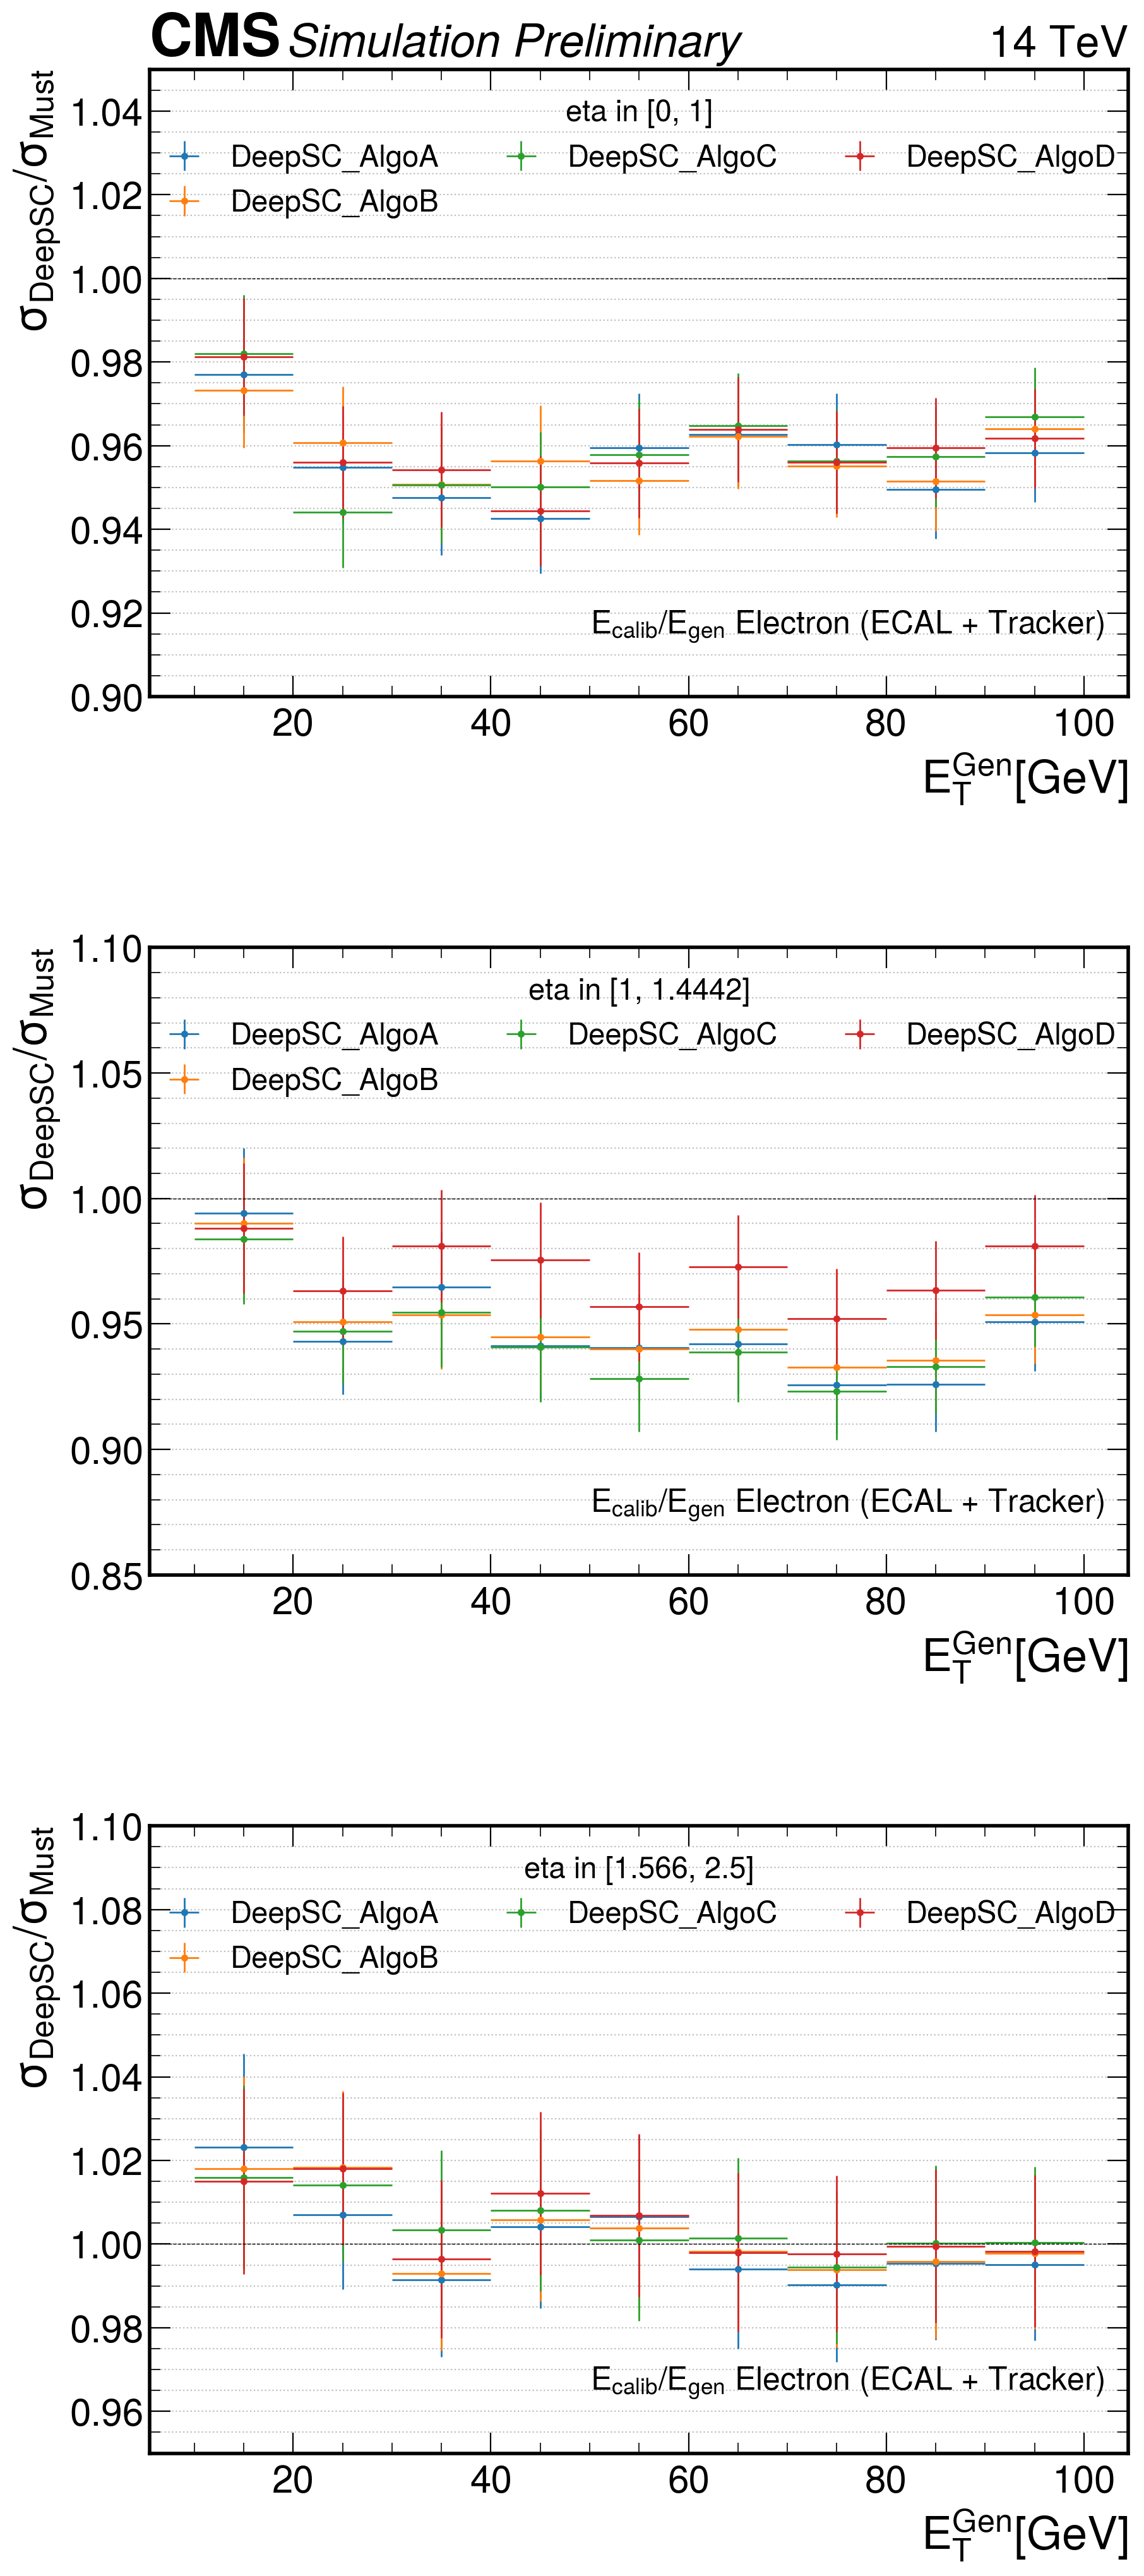

In [17]:
do_summary_plot(panels_res_byEt, [(0.9, 1.05), (0.85, 1.1), (0.95, 1.1)], output=output_folder)

In [18]:
panels_res_byPU= [
        {
        "file1": output_folder_A+'/resolution_ele_gen_matched_corr_byPU_eta_cruiff_sigmaAvg_deepsc.csv',
        "file2": output_folder_A+'/resolution_ele_gen_matched_corr_byPU_eta_cruiff_sigmaAvg_mustache.csv',
        "file3": output_folder_B+'/resolution_ele_gen_matched_corr_byPU_eta_cruiff_sigmaAvg_deepsc.csv',
        "file4": output_folder_C+'/resolution_ele_gen_matched_corr_byPU_eta_cruiff_sigmaAvg_deepsc.csv',
        "file5": output_folder_D+'/resolution_ele_gen_matched_corr_byPU_eta_cruiff_sigmaAvg_deepsc.csv',
        "bins1":[50,55,60,65,70,75],
        "bins2": [0, 1, 1.4442, 1.566, 2.5], 
        "binCol1": "pu_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker)", 
        "xlabel":"$PU$", 
        "ylabel":"$\sigma_{DeepSC}/\sigma_{Must}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": f"$|\eta_{{Gen}}|$",
        "ylims":(0.9, 1.05),
    }
]

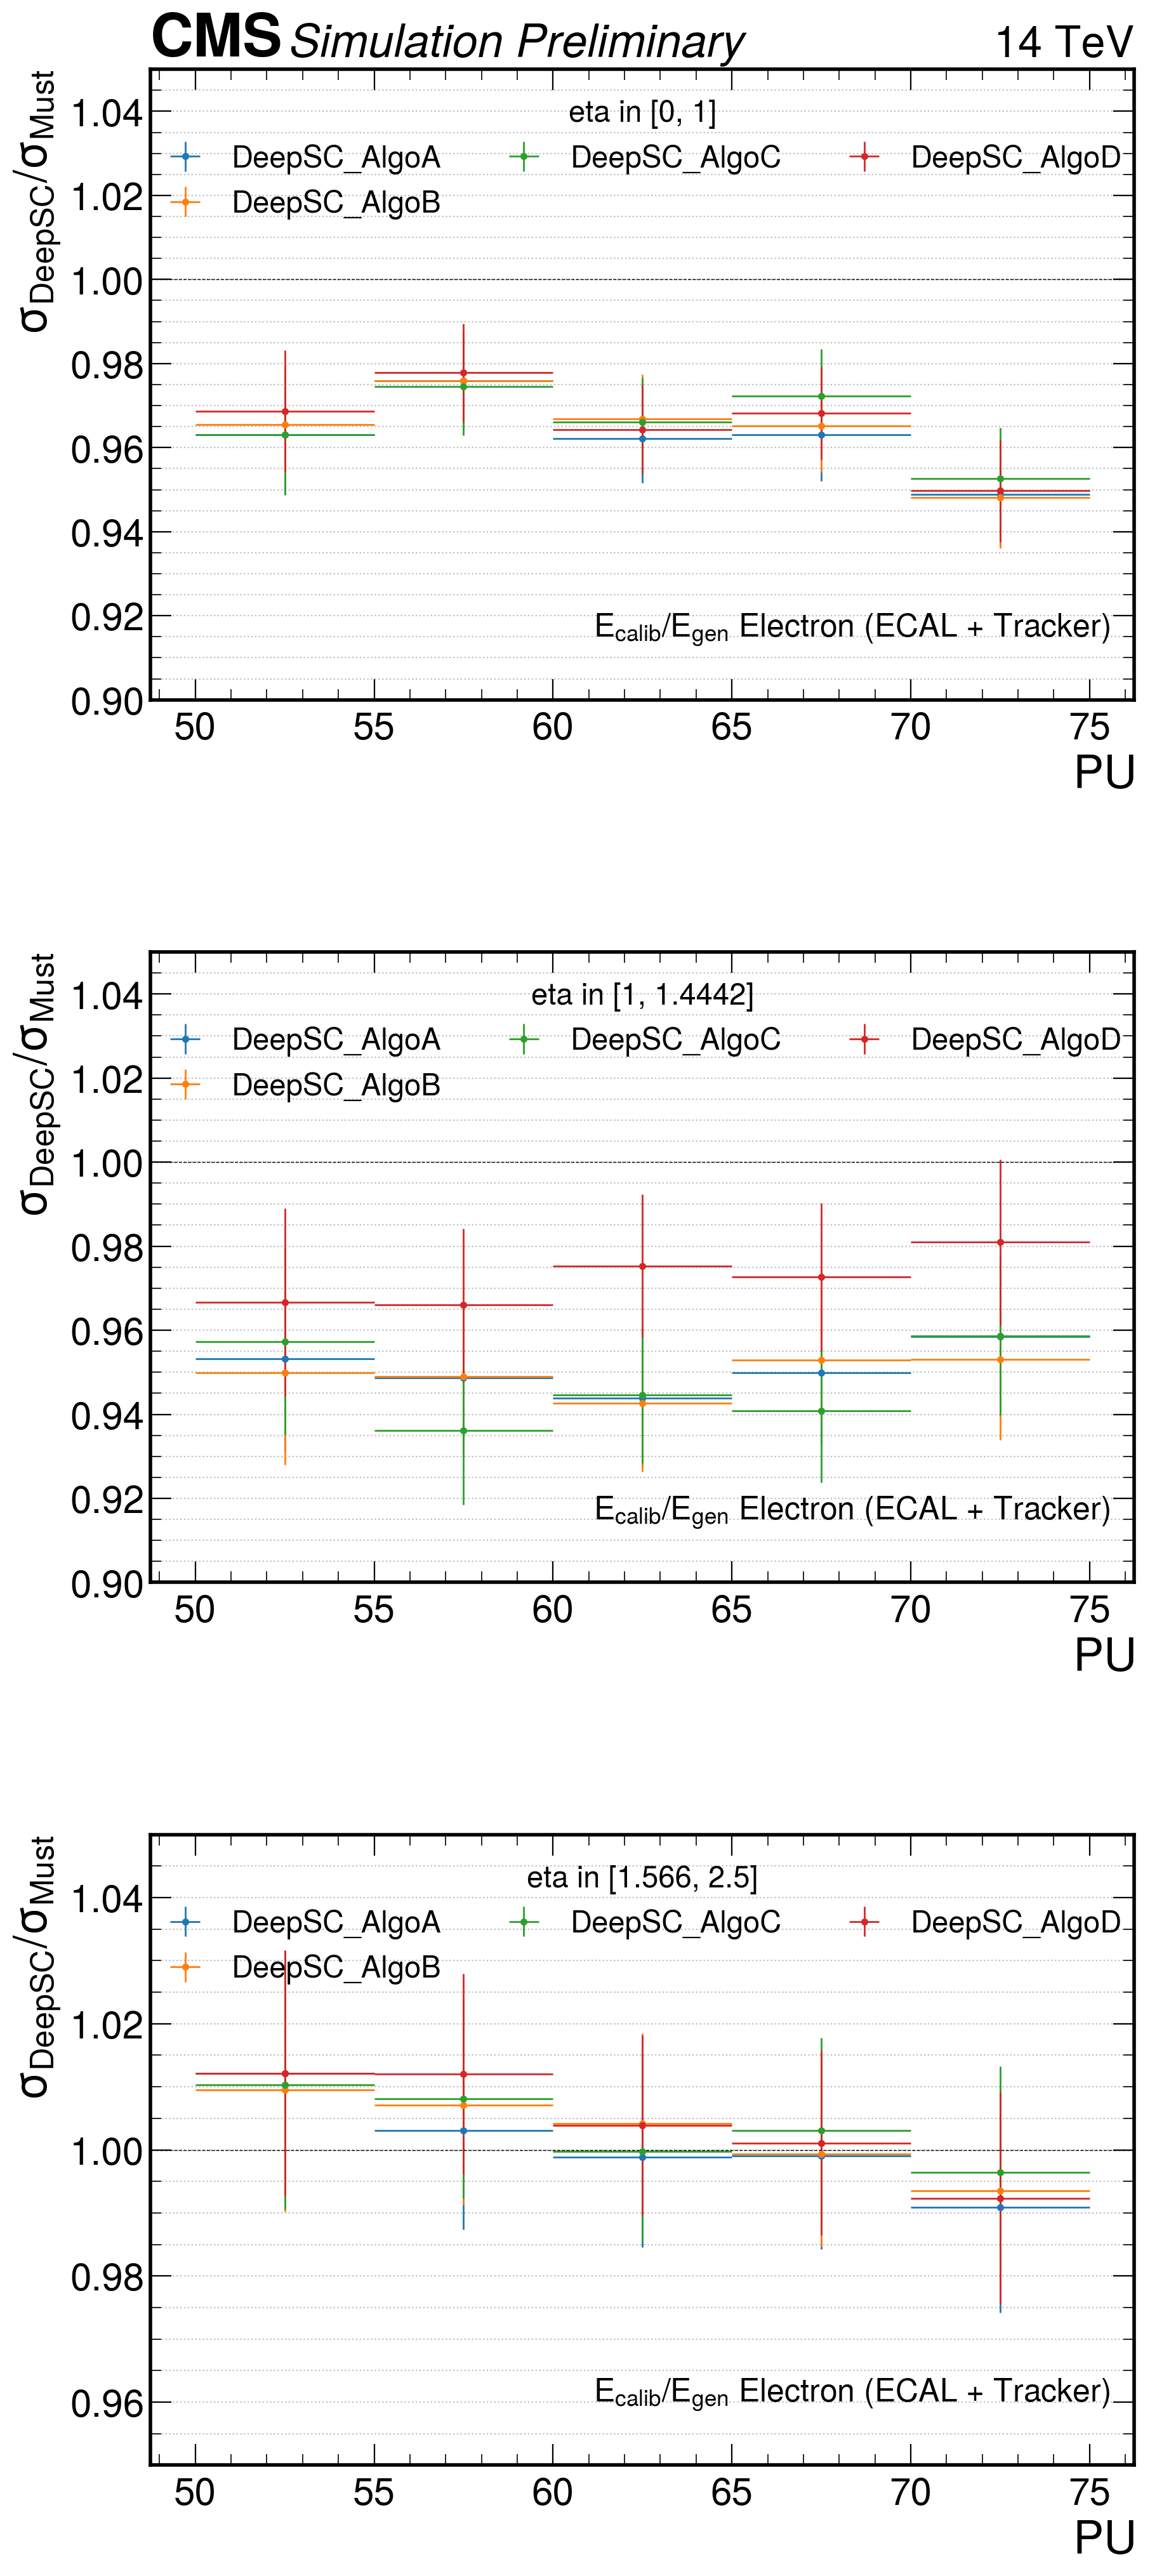

In [19]:
#Attention, les échelles ne sont pas les mêmes pour les 3 graphs
do_summary_plot(panels_res_byPU, [(0.9, 1.05), (0.9, 1.05), (0.95, 1.05)], output=output_folder)

# Bias summary plots

In [20]:
output_folder_A = f"/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/{reco_A}"
output_folder_B = f"/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/{reco_B}"
output_folder_C = f"/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/{reco_C}"
output_folder_D = f"/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/{reco_D}"

panels_res_byEt = [

    {
        "file1": output_folder_A+'/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
        "file2": output_folder_A+'/resolution_ele_gen_matched_byEt_cruijff_mustache.csv',
        "file3": output_folder_B+'/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
        "file4": output_folder_C+'/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
        "file5": output_folder_D+'/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
        "bins1": [10, 20, 30, 40, 50, 60, 70, 80, 90 ,100],
        "bins2": [0, 1, 1.4442, 1.566, 2.5],  
        "binCol1": "et_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker)",
        "xlabel":"$E_T^{Gen}[GeV]$", 
        "ylabel":"$\sigma_{DeepSC}/\sigma_{Must}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": f"$|\eta_{{Gen}}|$",
        "ylims":(0.9, 1.05),
    }
]

In [21]:
panels_bias_byEt = panels_res_byEt[:]

for p in panels_bias_byEt :
    p['yvar'] = "m"
    p['yvar_err'] = "m_err"
    p["ylabel"] ="$\mu_{DeepSC}/\mu_{Must}$"
    p["ylims"] = [0.98, 1.02]
    
panels_bias_byEt[0]["fill_between_y"] = [0.9, 1.05]
panels_bias_byEt

[{'file1': '/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/DeepSC_AlgoA/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
  'file2': '/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/DeepSC_AlgoA/resolution_ele_gen_matched_byEt_cruijff_mustache.csv',
  'file3': '/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/DeepSC_AlgoB/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
  'file4': '/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/DeepSC_AlgoC/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
  'file5': '/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/DeepSC_AlgoD/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
  'bins1': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
  'bins2': [0,

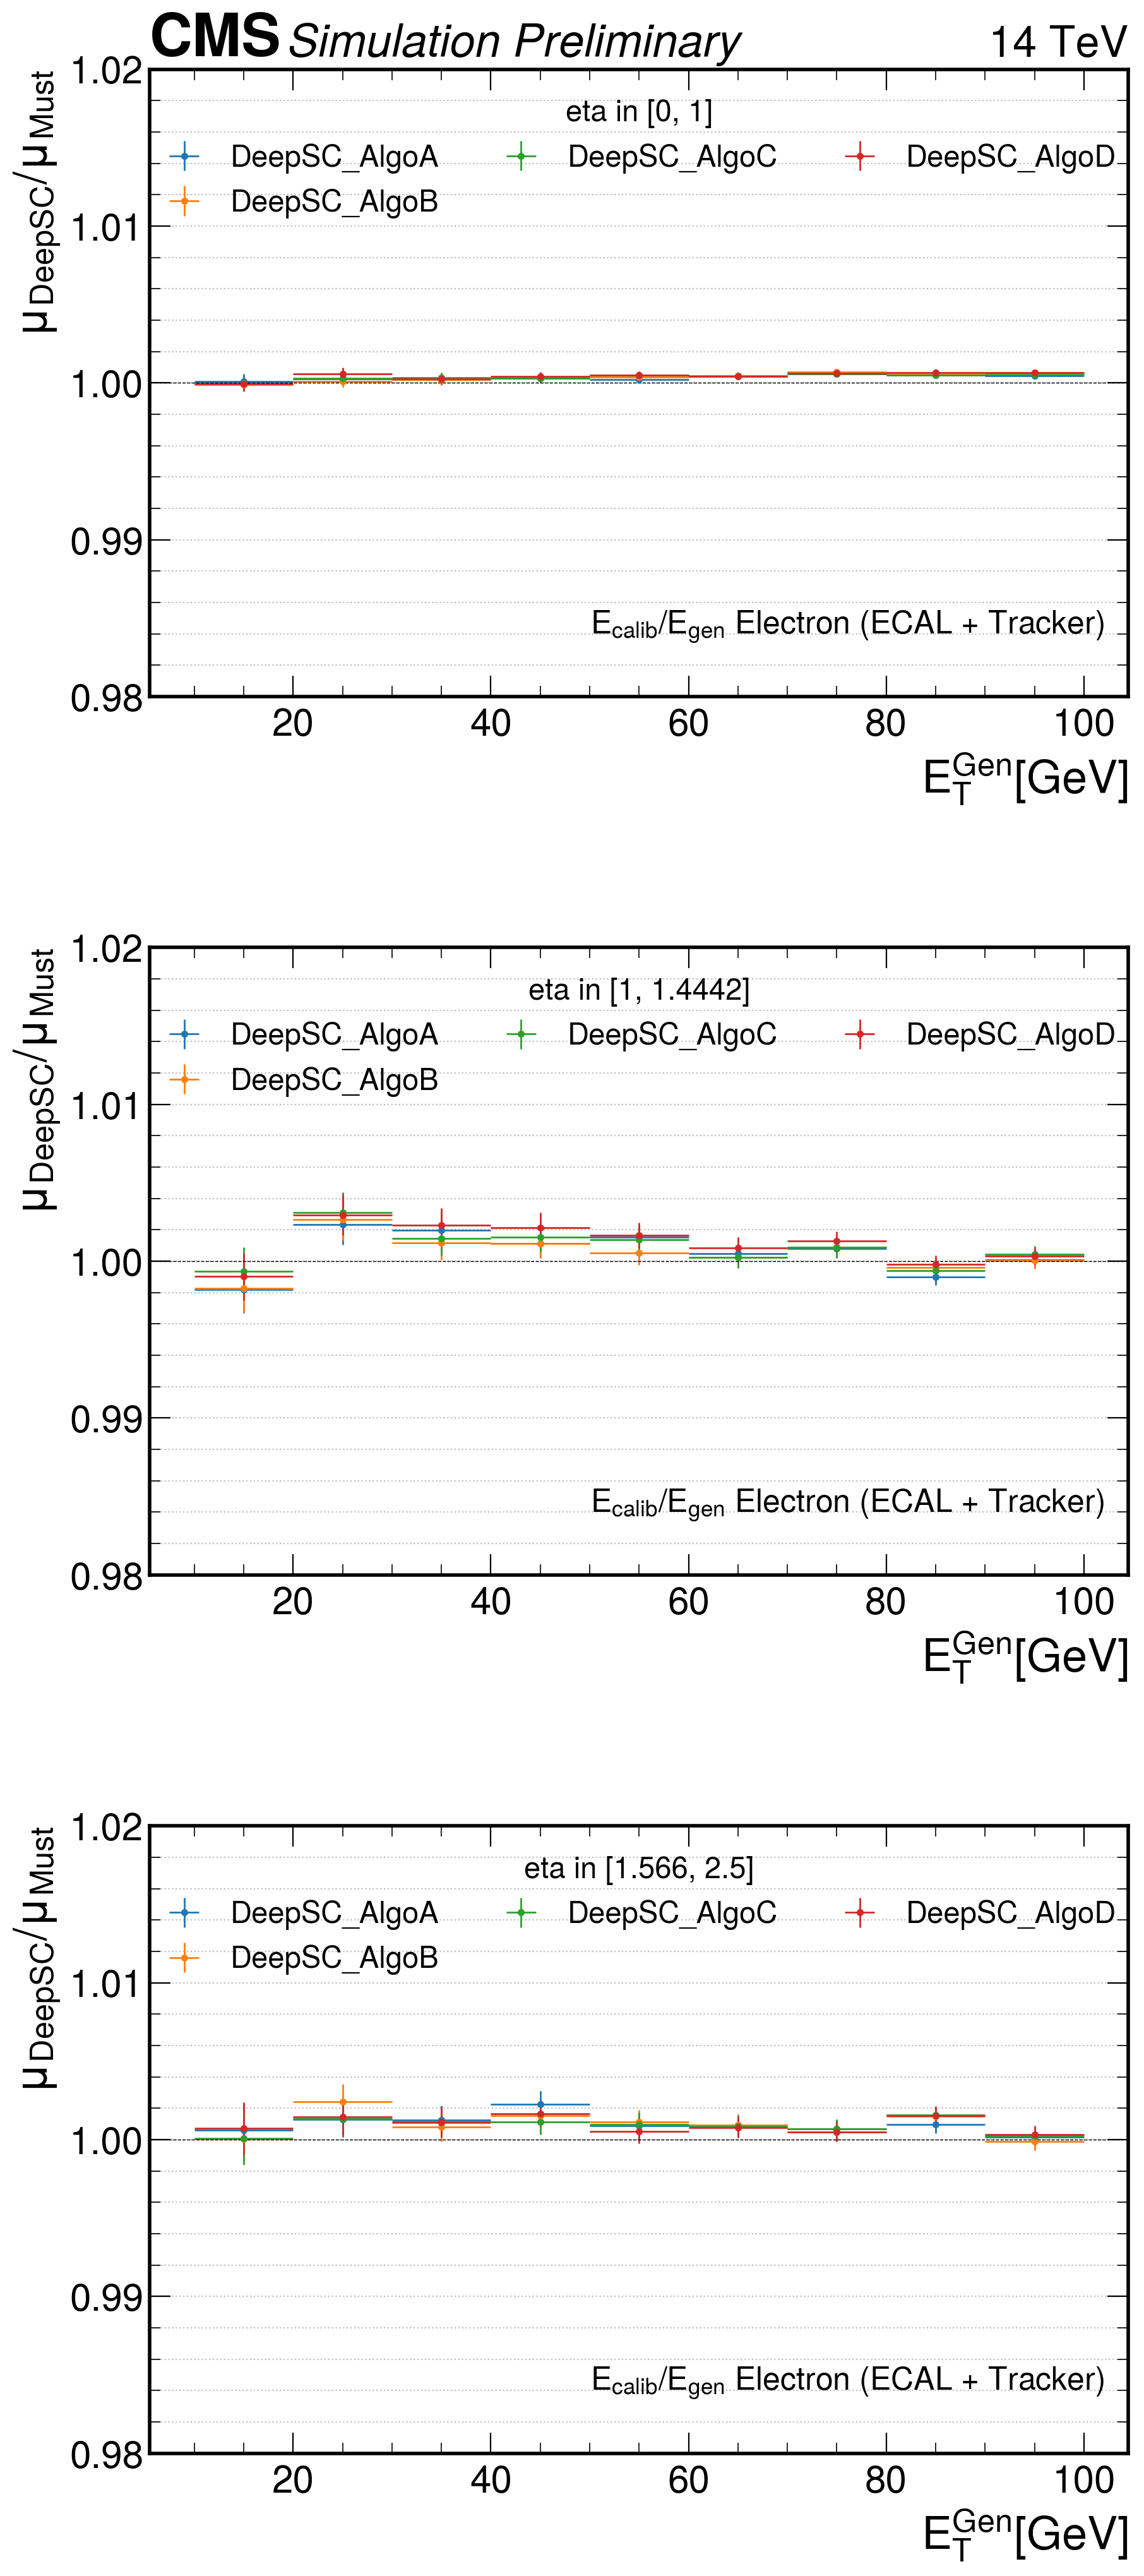

In [22]:
do_summary_plot(panels_bias_byEt, [(0.98, 1.02), (0.98, 1.02), (0.98, 1.02)], name="bias", output=output_folder)

In [23]:
panels_res_byPU= [
        {
        "file1": output_folder_A+'/resolution_ele_gen_matched_corr_byPU_eta_cruiff_sigmaAvg_deepsc.csv',
        "file2": output_folder_A+'/resolution_ele_gen_matched_corr_byPU_eta_cruiff_sigmaAvg_mustache.csv',
        "file3": output_folder_B+'/resolution_ele_gen_matched_corr_byPU_eta_cruiff_sigmaAvg_deepsc.csv',
        "file4": output_folder_C+'/resolution_ele_gen_matched_corr_byPU_eta_cruiff_sigmaAvg_deepsc.csv',
        "file5": output_folder_D+'/resolution_ele_gen_matched_corr_byPU_eta_cruiff_sigmaAvg_deepsc.csv',
        "bins1":[50,55,60,65,70,75],
        "bins2": [0, 1, 1.4442, 1.566, 2.5], 
        "binCol1": "pu_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker)", 
        "xlabel":"$PU$", 
        "ylabel":"$\sigma_{DeepSC}/\sigma_{Must}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": f"$|\eta_{{Gen}}|$",
        "ylims":(0.9, 1.05),
    }
]

In [24]:
panels_bias_byPU = panels_res_byPU[:]
for p in panels_bias_byPU :
    p['yvar'] = "m"
    p['yvar_err'] = "m_err"
    p["ylabel"] ="$\mu_{DeepSC}/\mu_{Must}$"
    
panels_bias_byPU[0]["fill_between_y"] = [0.9, 1.05]
panels_bias_byPU

[{'file1': '/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/DeepSC_AlgoA/resolution_ele_gen_matched_corr_byPU_eta_cruiff_sigmaAvg_deepsc.csv',
  'file2': '/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/DeepSC_AlgoA/resolution_ele_gen_matched_corr_byPU_eta_cruiff_sigmaAvg_mustache.csv',
  'file3': '/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/DeepSC_AlgoB/resolution_ele_gen_matched_corr_byPU_eta_cruiff_sigmaAvg_deepsc.csv',
  'file4': '/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/DeepSC_AlgoC/resolution_ele_gen_matched_corr_byPU_eta_cruiff_sigmaAvg_deepsc.csv',
  'file5': '/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/electrons/DeepSC_AlgoD/resolution_ele_gen_matched_corr_byPU_eta_cruiff_sigma

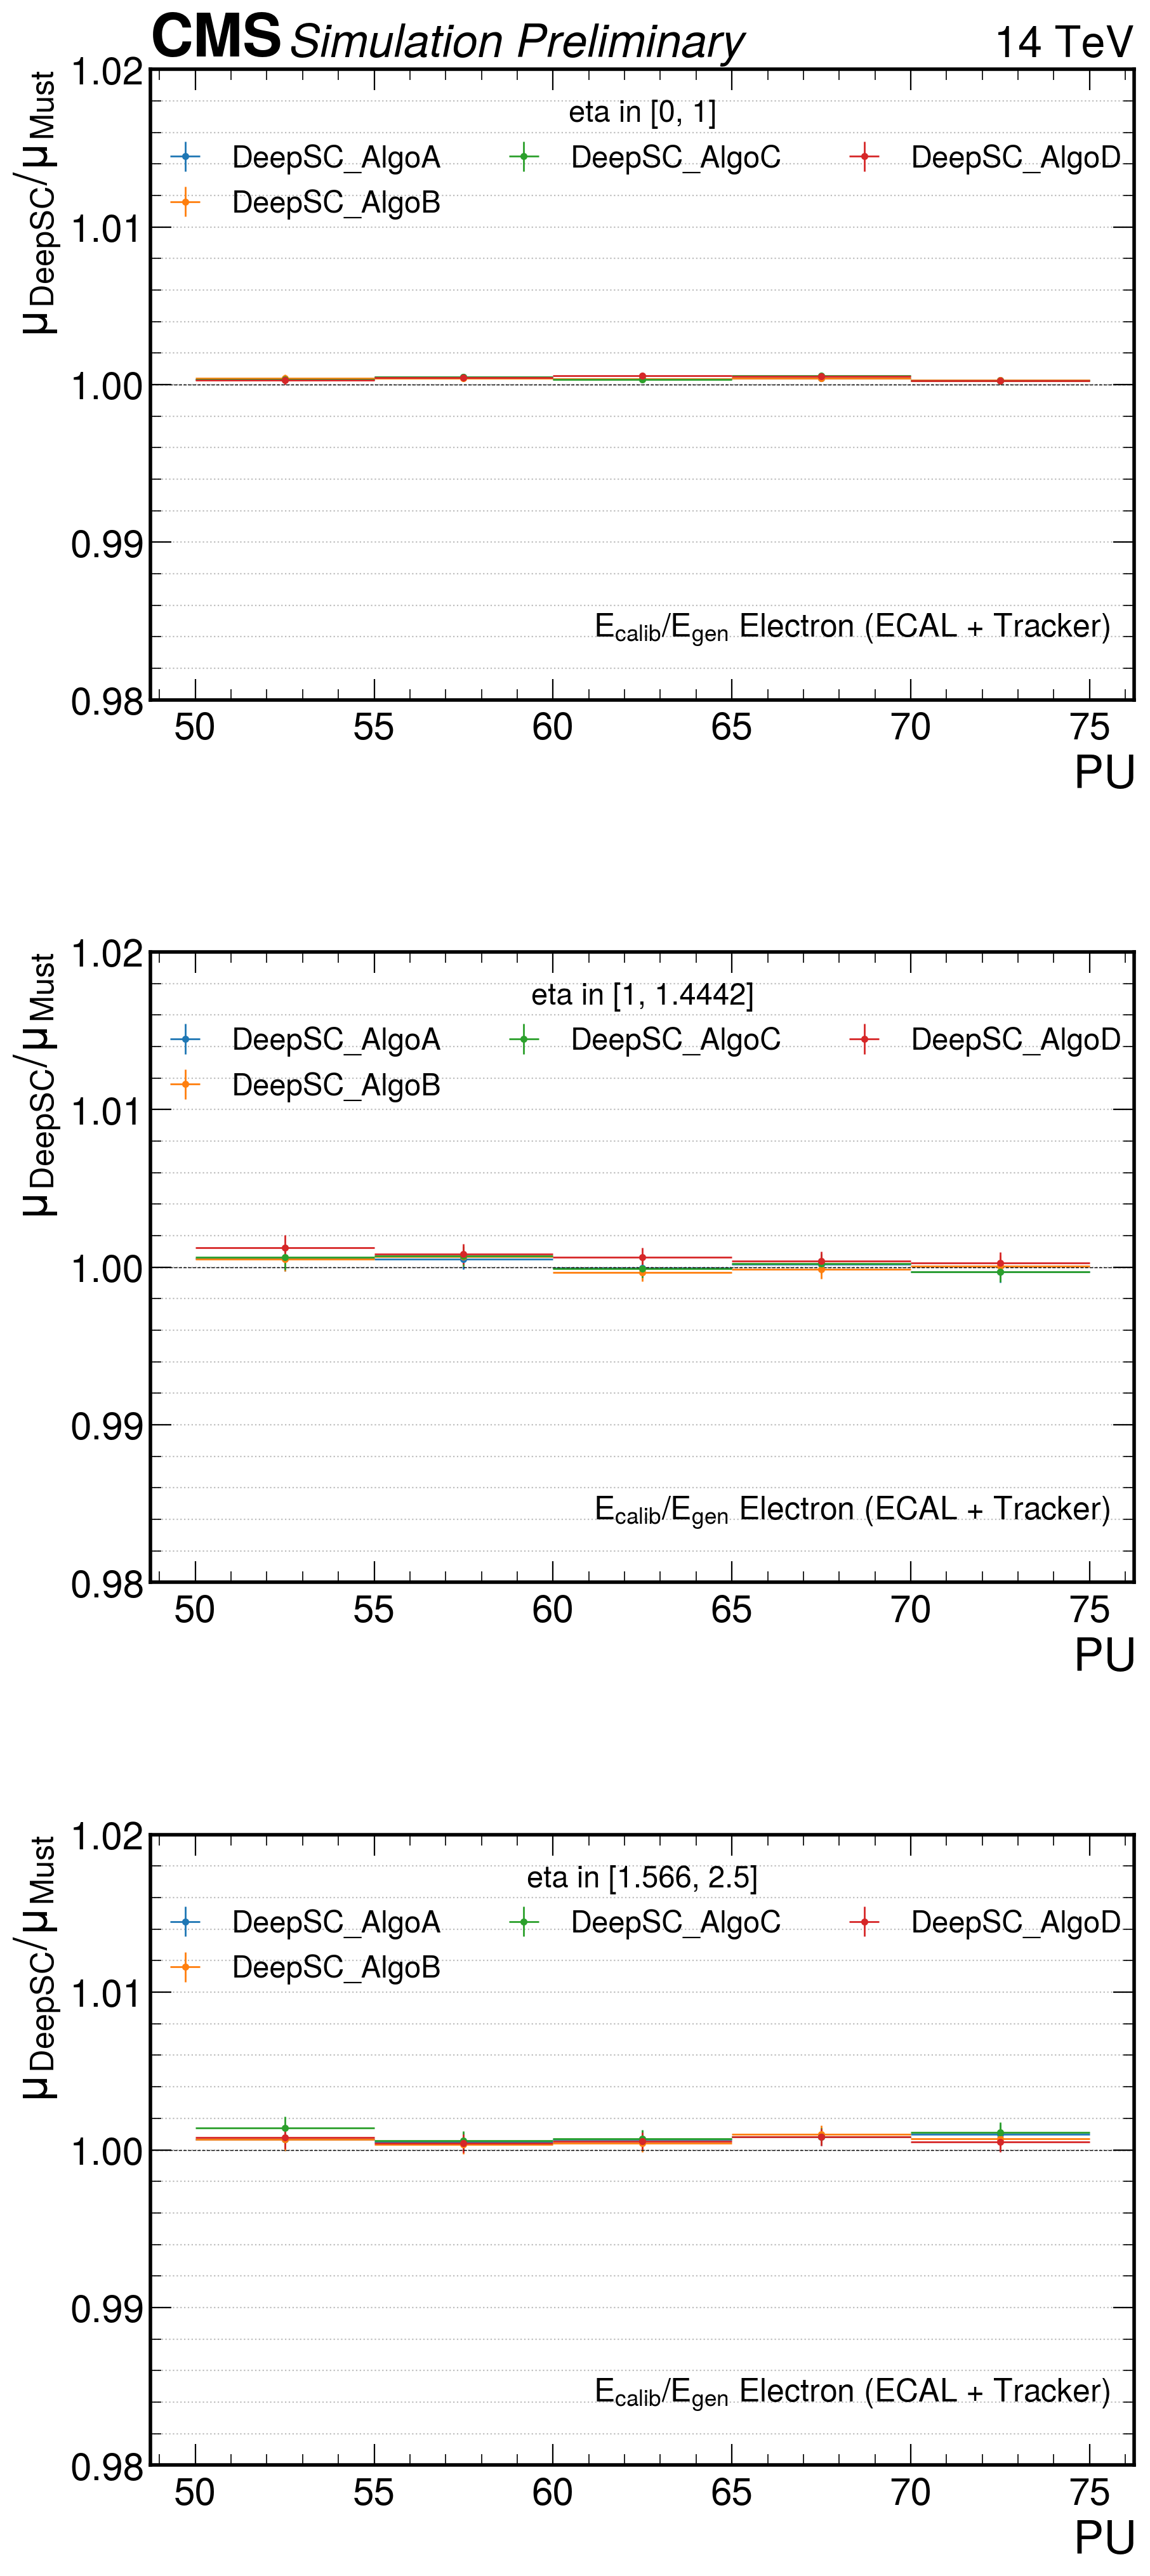

In [25]:
do_summary_plot(panels_bias_byPU, [(0.98, 1.02), (0.98, 1.02), (0.98, 1.02)], name="bias", output=output_folder)